###### Imports and Inputs

In [ ]:
import numpy as np
tolerance = np.exp(-10)

In [ ]:
px = list(map(float,input('Enter the probability of each outcome in X separated by a space: ').split()))
while abs(sum(px)-1) > tolerance:
  print('Given PMF for X is incorrect.')
  px = list(map(float,input('Enter the probability of each outcome in X separated by a space: ').split()))

Enter the probability of each outcome in X separated by a space: 
Given PMF for X is incorrect.
Enter the probability of each outcome in X separated by a space: 0.1 0.2 0.3 0.4


In [ ]:
py = list(map(float,input('Enter the probability of each outcome in Y separated by a space: ').split()))
while abs(sum(py)-1) > tolerance:
  print('Given PMF for Y is incorrect.')
  py = list(map(float,input('Enter the probability of each outcome in Y separated by a space: ').split()))

Enter the probability of each outcome in Y separated by a space: 0.1 0.1 0.2 0.2 0.4


In [ ]:
given_pmf = np.array([float(input(f'Enter the probability of outcome with X={i} and Y={j}: ')) for i in range(len(px)) for j in range(len(py))])

## Lab 7 Joint Discrete Random Variables
#### Jaskirat Singh Maskeen 23110146

Let X and Y be two random variables with user given PMF.<br>
Let the user give a Joint PMF for these two random variables, that is, <br>

### $P_{XY}(x_{i},y_{j})$ $\forall$ $x_{i} \in X$ and $\forall$ $y_{i} \in Y$.<br>


In [ ]:
px = np.array([0.1,0.2,0.7])
py = np.array([0.2,0.5,0.2,0.1])
given_pmf = np.array([
    [0.02,0.05,0.02,0.01],
    [0.04,0.1,0.04,0.02],
    [0.14,0.35,0.14,0.07]
])
if abs(np.sum(given_pmf) -1 )> tolerance:
  print('Given Joint PMF is incorrect')

### Q1. Joint PMF of independent variables

If X and Y are two independent random variables then,<br>
$$
P_{XY}(x_{i},y_{j}) = P_{X}(x_{i}) \times P_{Y}({y_{j})}
$$




In [ ]:
independent_pmf = np.array([[i*j for i in py] for j in px])
if np.allclose(given_pmf,independent_pmf):
  print('The given Joint PMF indicates that X and Y are independent random variables.')
else:
  print('The given Joint PMF does not indicate that X and Y are independent random variables.')

The given Joint PMF indicates that X and Y are independent random variables.


### Q2. Marginal PMF and CDF

#### Marginal PMF:
Let a joint PMF be given, to compute the marginal PMFs, <br><br>
$P_{X}(x) = \sum_{y_{j}} P_{XY}(x,y_{j})$ <br><br>
$P_{Y}(y) = \sum_{x_{i}} P_{XY}(x_{i},y)$<br>
<br>

#### Marginal CDF:
To compute the marginal CDFs, we use the marginal PMFs,<br><br>
$F_{X}(x) = \mathbb{P}[X <= x] = \sum_{k=0}^{x} P_{X}(k)$<br><br>
$F_{Y}(y) = \mathbb{P}[Y <= y] = \sum_{k=0}^{y} P_{Y}(k)$

#### Joint CDF:
$F_{XY}(x,y) = \mathbb{P}[ X <= x$ and $Y <= y ] = \sum_{h=0}^{x}\sum_{k=0}^{y} P_{XY}(h,k)$


In [ ]:
def marginals(j_pmf):
  py = np.sum(j_pmf,axis=0)
  px = np.sum(j_pmf,axis=1)
  return px,py
marginal_px,marginal_py = marginals(given_pmf)
print(f'Marginal Px = {marginal_px}')
print(f'Marginal Py = {marginal_py}')
print()
marginal_cdf_x = np.cumsum(marginal_px/np.sum(marginal_px))
marginal_cdf_y = np.cumsum(marginal_py/np.sum(marginal_py))
print(f'Marginal CDF of Px = {marginal_cdf_x}')
print(f'Marginal CDF of Py = {marginal_cdf_y}')
print()
dsc = []
for i in range(len(px)):
  for j in range(len(py)):
    val = np.sum(given_pmf[:(i+1),:(j+1)])
    dsc.append(val)
dsc = np.array(dsc)
joint_cdf = np.reshape(dsc,(len(px),len(py)))
print('Joint CDF of given PMF is: ')
print(joint_cdf)

Marginal Px = [0.1 0.2 0.7]
Marginal Py = [0.2 0.5 0.2 0.1]

Marginal CDF of Px = [0.1 0.3 1. ]
Marginal CDF of Py = [0.2 0.7 0.9 1. ]

Joint CDF of given PMF is: 
[[0.02 0.07 0.09 0.1 ]
 [0.06 0.21 0.27 0.3 ]
 [0.2  0.7  0.9  1.  ]]


Making Plots of the given PMFs and CDFs

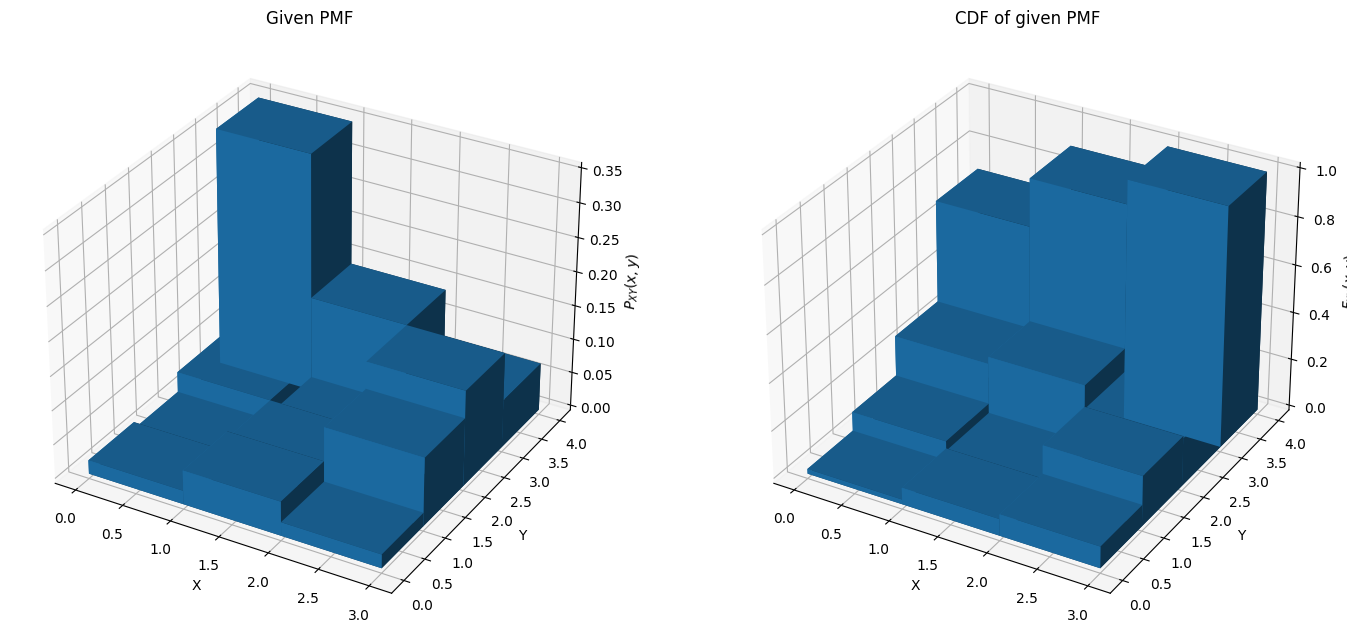

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,8))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
_x,_y = np.meshgrid(range(len(px)),range(len(py)))
x,y = _x.ravel(),_y.ravel()
top = given_pmf.ravel()

bottom = np.zeros_like(top)
width = 1
depth = 1
ax1.set_title('Given PMF')
ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('$P_{XY}(x,y)$')
ax2.set_title('CDF of given PMF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('$F_{XY}(x,y)$')
ax2.bar3d(x, y, bottom, width, depth, joint_cdf.ravel(), shade=True)
plt.show()

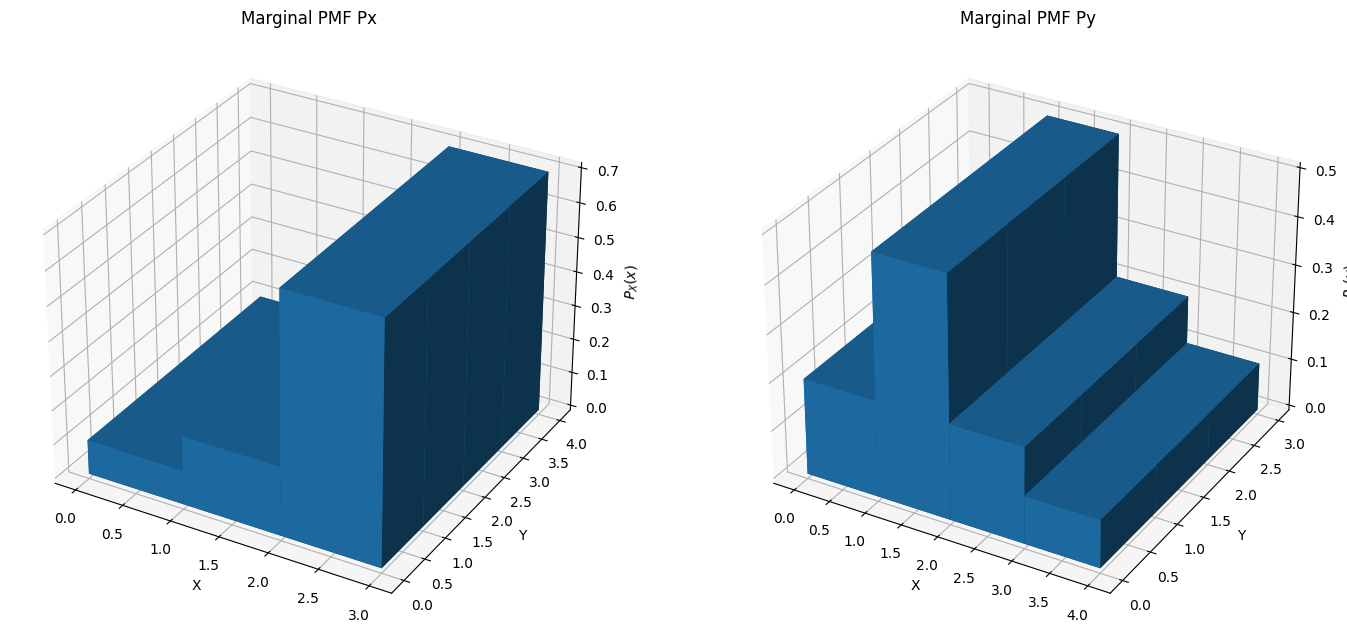

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
_x,_y = np.meshgrid(range(len(px)),range(len(py)))
x,y = _x.ravel(),_y.ravel()

_x2,_y2 = np.meshgrid(range(len(py)),range(len(px)))
x2,y2 = _x2.ravel(),_y2.ravel()
width = 1
depth = 1

ax1.set_title('Marginal PMF Px')
ax1.bar3d(x, y, np.zeros_like(list(marginal_px)*len(py)), width, depth, list(marginal_px)*len(py), shade=True)
ax2.set_title('Marginal PMF Py')
ax2.bar3d(x2, y2, np.zeros_like(list(marginal_py)*len(px)), width, depth, list(marginal_py)*len(px), shade=True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('$P_{X}(x)$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('$P_{Y}(y)$')
plt.show()

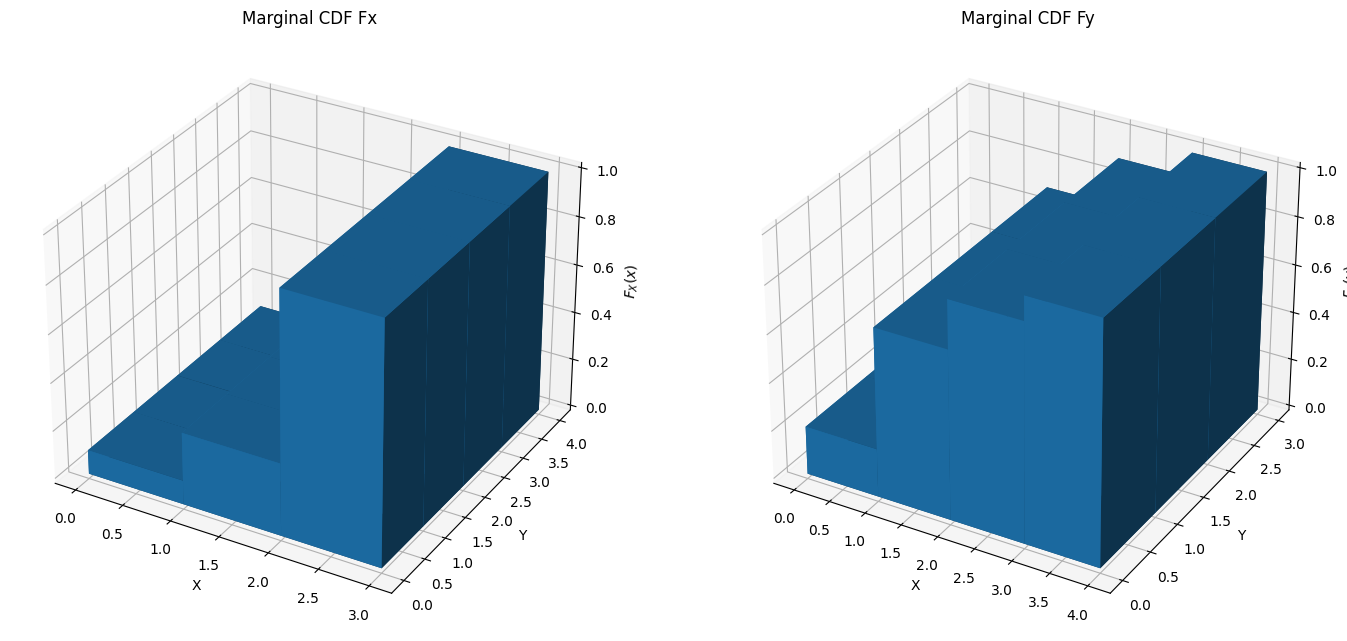

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
_x,_y = np.meshgrid(range(len(px)),range(len(py)))
x,y = _x.ravel(),_y.ravel()

_x2,_y2 = np.meshgrid(range(len(py)),range(len(px)))
x2,y2 = _x2.ravel(),_y2.ravel()
width = 1
depth = 1

ax1.set_title('Marginal CDF Fx')
ax1.bar3d(x, y, np.zeros_like(list(marginal_cdf_x)*len(py)), width, depth, list(marginal_cdf_x)*len(py), shade=True)
ax2.set_title('Marginal CDF Fy')
ax2.bar3d(x2, y2, np.zeros_like(list(marginal_cdf_y)*len(px)), width, depth, list(marginal_cdf_y)*len(px), shade=True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('$F_{X}(x)$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('$F_{Y}(y)$')
plt.show()

### Q3. Determining Expectation and Covariance

$$
\mathbb{E}[XY] = \sum_{y}\sum_{x} x.y.P_{XY}(x_{i},y_{j})
$$
<br>
<br>
$$
X_{1} = X-\mathbb{E}[X]
$$
$$
Y_{1} = Y-\mathbb{E}[Y]
$$
<br>
<br>
$$
\mathbb{E}[X_{1}Y_{1}] = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X].\mathbb{E}[Y] = Cov(X,Y)
$$

Cov(X,Y) = 0 also indicates the independence of the two random variables X and Y

In [ ]:
exy = 0
for i in range(len(px)):
  for j in range(len(py)):
    exy+=i*j*given_pmf[i][j]
print(f'E[XY] = {exy}')
ex = 0
for i in range(len(px)):
  ex+=i*px[i]

ey = 0
for i in range(len(py)):
  ey+=i*py[i]

cov = exy-ex*ey
if abs(cov) < tolerance:
  cov = 0

print(f'E[X1Y1] = Cov(X,Y) = {cov}')



E[XY] = 1.92
E[X1Y1] = Cov(X,Y) = 0
